In [1]:
def reg(x,y):
    regr = linear_model.LinearRegression()
    x_constant = pd.concat([x,pd.Series([1]*len(x),index = x.index)], axis=1)
    regr.fit(x_constant, y)    
    beta = regr.coef_[0]
    alpha = regr.intercept_
    spread = y - x*beta - alpha
    return spread

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import statsmodels.api as sm
from math import floor
plt.style.use('seaborn-whitegrid')
from sklearn import linear_model


market_data = pd.read_csv("data/market_data.csv",parse_dates=True, index_col=0)
trades = pd.read_csv("data/trades.csv")

In [37]:
plt.style.use('ggplot')

#ESX
esx = market_data[market_data['Instrument'] == 'ESX-FUTURE']

#SP
sp = market_data[market_data['Instrument'] == 'SP-FUTURE']

In [40]:
spread = reg(np.log(esx['Ask Price'].head(11000)), np.log(sp['Ask Price'].head(11000))).dropna()

Text(0,0.5,'spread')

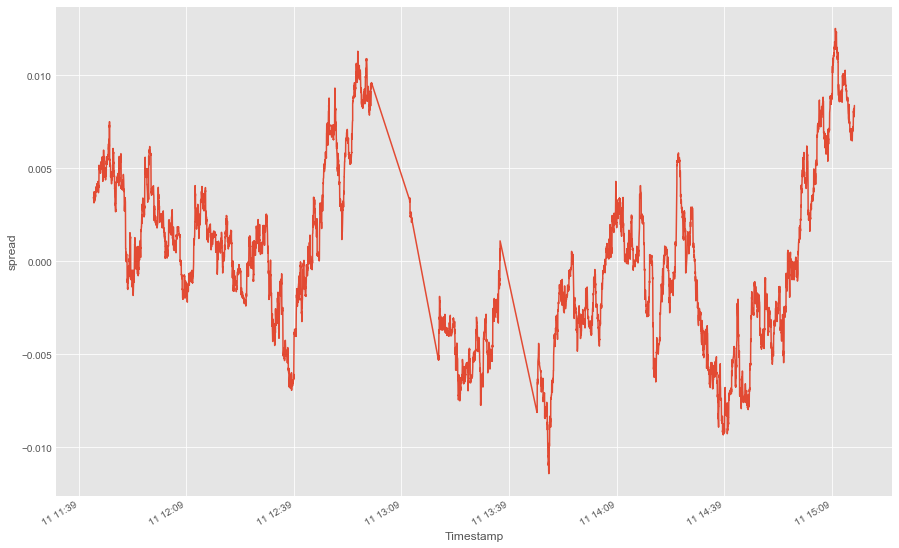

In [41]:
spread.plot(figsize =(15,10))
plt.ylabel('spread')

In [70]:
spread.shape

(11029,)

In [54]:
def decide(sp, exp):
    threshold = 1
    sp_quantity = 0
    esx_quantity = 0
    mean = np.mean(spread)
    std = np.std(spread)
    ratio = floor(sp/exp)
        
    if spread.tail(1)[-1] > mean + threshold * std:
        if not esx_quantity > 0 and not sp_quantity < 0:
            sell("sp", 100)
            buy("exp",  ratio * 100)
        
        elif spread.tail(1) < mean - self.threshold * std:
            if not sp_quantity < 0 and not exp_quantity > 0:
                sell("exp", 100)
                buy("sp", ratio * 100) 

        else:
            liquidate()


In [68]:
decide(100, 11111)

selling sp 100
buying exp 0


In [56]:
def sell(index, amount):
    print("selling", index, amount)
    return

In [57]:
def buy(index, amount):
    print("buying", index, amount)
    return